In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
from scipy import stats

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [2]:
pre_LTD50 = pd.read_pickle('/data/ana_pre_50Hz_reci')
pre_LTD50_uni = pd.read_pickle('/data/ana_pre_50Hz_uni')

In [3]:
pre_LTD50_uni

,Before,After,File name,elimi
9,"{'raw_amp1': [6.91766659884e-11, 3.7812684465e...","{'raw_amp1': [5.50633223896e-11, 6.02184563525...",2016081002,27
10,"{'raw_amp1': [4.25538736038e-11, 1.35087758433...","{'raw_amp1': [5.08677195683e-11, nan, nan, 1.2...",2016081703,40
12,"{'raw_amp1': [nan, 1.78216157756e-11, nan, nan...","{'raw_amp1': [1.27647945513e-10, 8.76010109602...",2016092903,28
13,"{'raw_amp1': [6.86601147028e-11, 1.29599103479...","{'raw_amp1': [2.21491407434e-10, 1.54914377081...",2016101201,17
19,"{'raw_amp1': [1.51849922151e-11, 1.80747636369...","{'raw_amp1': [1.64956917116e-11, 1.75131484848...",2017053101,50
20,"{'raw_amp1': [2.46323409201e-11, 1.67016805306...","{'raw_amp1': [2.70037265854e-11, 1.345921604e-...",2017051501,22


In [4]:
pre_LTD50

,Before,After,File name,elimi
11,"{'raw_amp1': [1.69747676368e-10, 1.57267708116...","{'raw_amp1': [3.72078115071e-10, nan, nan, nan...",2016081704,40
14,"{'raw_amp1': [2.87252717053e-11, nan, 3.384681...","{'raw_amp1': [1.92408507059e-11, 3.84268532425...",2016091201,60
15,"{'raw_amp1': [7.73428875928e-11, 1.192633126e-...","{'raw_amp1': [9.39383125007e-11, nan, 4.794483...",2016100201,25
16,"{'raw_amp1': [nan, 3.20853627622e-11, 6.201548...","{'raw_amp1': [1.21757212607e-10, 8.84237378195...",2016100303,40
17,"{'raw_amp1': [5.56111999043e-11, 4.83558605644...","{'raw_amp1': [1.91575921793e-10, nan, nan, nan...",2016100304,30
18,"{'raw_amp1': [2.97486731247e-10, 2.16532623897...","{'raw_amp1': [1.81853787722e-10, nan, nan, nan...",2017021302,35


/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

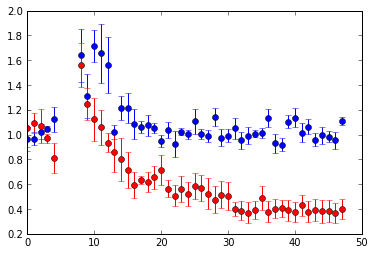

In [5]:
ave_ptl_resp = np.ones((len(pre_LTD50_uni), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(pre_LTD50_uni, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(pre_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(pre_LTD50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

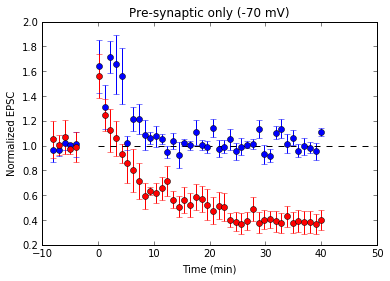

In [6]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_LTD50_uni)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_LTD50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 2.0])
plt.title('Pre-synaptic only (-70 mV)')

with PdfPages('/data/Figure5_1.pdf') as pdf:
    pdf.savefig()

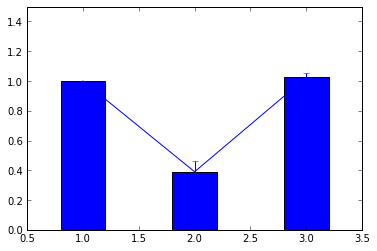

In [35]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_50Hz, mean_amp_aft_2Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_50Hz, mean_amp_aft_2Hz],yerr = [0, std_amp_aft_50Hz, std_amp_aft_2Hz], fmt='')
plt.ylim([0,1.5])

with PdfPages('/data/Figure5_2.pdf') as pdf:
    pdf.savefig()

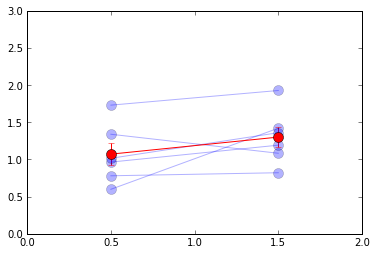

In [8]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_LTD50['Before'].loc[i]['PPR']) for i in pre_LTD50['Before'].index]
mean_PPR_aft = [np.nanmean(pre_LTD50['After'].loc[i]['PPR'][-10:]) for i in pre_LTD50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_1.pdf') as pdf:
    pdf.savefig()

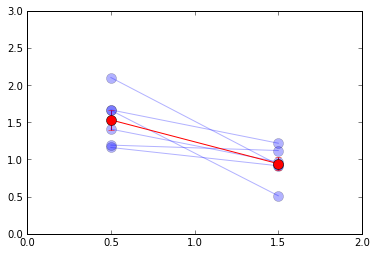

In [9]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_LTD50_uni['Before'].loc[i]['PPR']) for i in pre_LTD50_uni['Before'].index]
mean_PPR_aft = [np.nanmean(pre_LTD50_uni['After'].loc[i]['PPR'][-10:]) for i in pre_LTD50_uni['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_2.pdf') as pdf:
    pdf.savefig()

In [10]:
pre_LTD50['Before'].index

Int64Index([11, 14, 15, 16, 17, 18], dtype='int64')

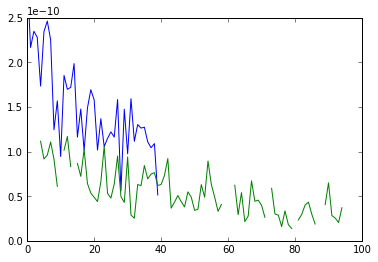

In [11]:
test_id = 18
plt.plot(pre_LTD50['Before'].loc[test_id]['raw_amp1'])
plt.plot(pre_LTD50['After'].loc[test_id]['raw_amp1'])

Ttest_relResult(statistic=-1.1900357016065803, pvalue=0.28745130736321611)


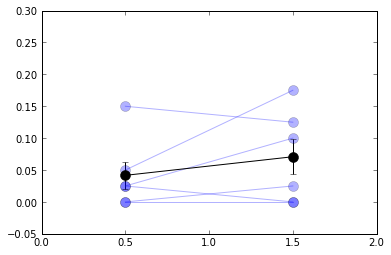

In [18]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_LTD50_uni['Before'].loc[i]['failure'])/40 for i in pre_LTD50_uni['Before'].index]
mean_fail_aft = [np.sum(pre_LTD50_uni['After'].loc[i]['failure'][-40:])/40 for i in pre_LTD50_uni['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure5_3.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-3.9545287800622253, pvalue=0.010801724607794617)


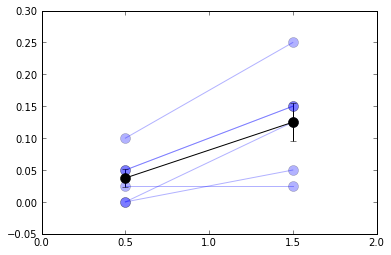

In [19]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_LTD50['Before'].loc[i]['failure'])/40 for i in pre_LTD50['Before'].index]
mean_fail_aft = [np.sum(pre_LTD50['After'].loc[i]['failure'][-40:])/40 for i in pre_LTD50['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure5_4.pdf') as pdf:
    pdf.savefig()

In [32]:
r_2

[1.2794816909740214,
 0.86931603963631365,
 0.73699731288592163,
 0.72168025335827735]

/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


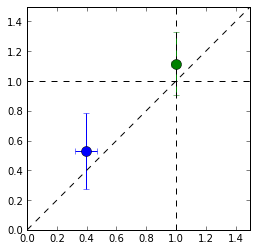

In [37]:
# CV analysis
r_50, pi_50 = patch_pip.cv_analysis(pre_LTD50, bef_len=15, aft_len=100)

plt.errorbar(np.mean(pi_50), np.mean(r_50), np.std(r_50)/np.sqrt(len(r_50)), np.std(pi_50)/np.sqrt(len(pi_50)),  'o', markersize=10)

# CV analysis
r_2, pi_2 = patch_pip.cv_analysis(pre_LTD50_uni, bef_len=15, aft_len=100)
r_2.pop(3)
pi_2.pop(3)

plt.errorbar(np.mean(pi_2), np.mean(r_2), np.std(r_2)/np.sqrt(len(r_2)), np.std(pi_2)/np.sqrt(len(pi_2)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')

with PdfPages('/data/Figure5_5.pdf') as pdf:
    pdf.savefig()

NameError: name 'pre_LTD2' is not defined

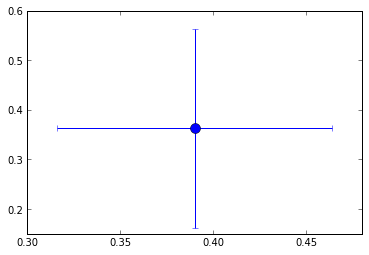

In [15]:
# CV analysis
cv_mean_bef = [np.nanmean(pre_LTD50['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_LTD50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(pre_LTD50['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_LTD50['Before'].index]
end_aft = [pre_LTD50['elimi'].values[i] for i in range(len(pre_LTD50))]
cv_std_aft = [np.nanstd(pre_LTD50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_LTD50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(pre_LTD2['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_LTD2['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(pre_LTD2['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_LTD2['Before'].index]
end_aft = [pre_LTD2['elimi'].values[i] for i in range(len(pre_LTD2))]
cv_std_aft = [np.nanstd(pre_LTD2['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_LTD2['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure1_7.pdf') as pdf:
    pdf.savefig()

In [ ]:
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='Uni (n={a})'.format(a=len(pre_LTD50_uni)))
plt.plot(np.ones((60))*1, 'k--')

ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_LTD50)))

plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')
plt.axis([0,60,0.2,2])